In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
y_test = y_test.reshape(-1,)

In [22]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

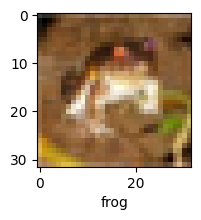

In [27]:

plot_sample(x_train, y_train, 0)

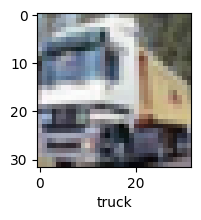

In [29]:
plot_sample(x_train, y_train, 1)

In [32]:
X_train = x_train / 255.0
X_test = x_test / 255.0

**Build artificial neuro netork for image clasification**

In [33]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - accuracy: 0.3042 - loss: 1.9297
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 88ms/step - accuracy: 0.4209 - loss: 1.6430
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.4529 - loss: 1.5562
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.4765 - loss: 1.4910
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 88ms/step - accuracy: 0.4963 - loss: 1.4401


In [34]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.24      0.37      1000
           1       0.69      0.54      0.61      1000
           2       0.51      0.16      0.25      1000
           3       0.29      0.49      0.37      1000
           4       0.56      0.17      0.26      1000
           5       0.34      0.37      0.35      1000
           6       0.47      0.61      0.53      1000
           7       0.38      0.72      0.50      1000
           8       0.46      0.75      0.57      1000
           9       0.63      0.46      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.43     10000
weighted avg       0.51      0.45      0.43     10000



In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.3838 - loss: 1.6843
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6040 - loss: 1.1267
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.6594 - loss: 0.9814
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 41ms/step - accuracy: 0.6965 - loss: 0.8767
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 46ms/step - accuracy: 0.7131 - loss: 0.8214
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.7342 - loss: 0.7588
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7565 - loss: 0.7012
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7761 - loss: 0.6478
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7830 - loss: 0.6235
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7983 - loss: 0.5842


In [38]:

cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6961 - loss: 0.9244


[0.9339093565940857, 0.6945000290870667]

In [39]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([[2.07827874e-02, 8.61893750e-06, 1.07035721e-02, 9.13941324e-01,
        7.36971444e-04, 3.13812941e-02, 1.48918405e-02, 4.19392629e-04,
        7.10687181e-03, 2.72780762e-05],
       [2.76195584e-03, 1.50357676e-03, 7.09705091e-07, 1.66294942e-08,
        8.37803871e-09, 1.84203675e-09, 1.04119058e-09, 1.64238206e-11,
        9.95731354e-01, 2.39302403e-06],
       [5.15043586e-02, 1.58003047e-02, 7.77521636e-04, 1.34485401e-02,
        4.13845014e-03, 1.33839343e-03, 4.78077942e-04, 3.82091943e-03,
        8.90063226e-01, 1.86301991e-02],
       [3.69529873e-01, 8.60070228e-04, 9.90668125e-03, 3.63407657e-03,
        3.22869630e-03, 5.68581745e-04, 6.60168985e-03, 2.90731230e-04,
        6.05368495e-01, 1.11311329e-05],
       [8.98913527e-07, 1.61206208e-06, 3.56433960e-03, 1.73075125e-02,
        2.54911244e-01, 1.05904881e-03, 7.23143101e-01, 5.03029878e-06,
        6.68740222e-06, 4.72534566e-07]], dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

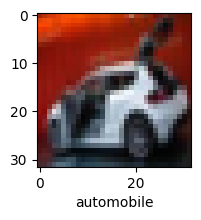

In [46]:
plot_sample(X_test, y_test,6)


In [45]:
classes[y_classes[6]]

'automobile'